<a href="https://colab.research.google.com/github/dcharan1002/Genre-and-Narrative-Impact-on-Book-Popularity/blob/main/Genre_and_Narrative_Impact_on_Book_Popularity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Importing the Data files

In [387]:
df_SPGC = pd.read_csv('/content/SPGC-metadata-2018-07-18.csv')
df_SPGC.head()

,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
0,PG0,NaN,NaN,NaN,NaN,NaN,NaN,set(),Text
1,PG1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,['en'],604.0,"{'United States -- History -- Revolution, 1775...",Text
2,PG2,The United States Bill of Rights: The Ten Orig...,United States,NaN,NaN,['en'],158.0,"{'Civil rights -- United States -- Sources', '...",Text
3,PG3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,['en'],28.0,{'Presidents -- United States -- Inaugural add...,Text
4,PG4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,['en'],55.0,{'Consecration of cemeteries -- Pennsylvania -...,Text


In [388]:
df_KLDscores = pd.read_csv('/content/KLDscores.csv')
df_KLDscores.head()

,filename,kld_values
0,PG10002,"[0.22391005737243896, 0.24226261808703536, 0.2..."
1,PG10005,"[0.24107767463211327, 0.24747085497572513, 0.2..."
2,PG10003,"[0.2502283960399736, 0.2304129699198611, 0.238..."
3,PG10008,"[0.2576982842724978, 0.2424932127358288, 0.220..."
4,PG10012,"[0.25125974534678364, 0.23622148585532693, 0.2..."


In [389]:
df_extra_controls = pd.read_csv("/content/extra_controls.csv")
df_extra_controls.head()

,id,subj2_war,subj2_adventure,subj2_comedy,subj2_biography,subj2_romance,subj2_drama,subj2_fantasy,subj2_family,subj2_sciencefiction,...,subj2_horror,subj2_mystery,subj2_crime,subj2_history,subj2_periodicals,subj2_others,speed,sentiment_avg,sentiment_vol,wordcount
0,PG10002,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.224141,0.08737,0.002701,50831.0
1,PG10005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.221966,0.13182,0.003394,70142.0
2,PG10006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.388199,0.18372,0.001003,13193.0
3,PG10007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.301656,0.15722,0.002895,27980.0
4,PG10008,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.204838,0.10778,0.003655,65421.0


##Merging the datasets

In [390]:
merged_df = pd.merge(df_SPGC, df_extra_controls, on='id', how='inner')
df_final = pd.merge(merged_df, df_KLDscores, left_on='id', right_on='filename', how='inner')
df_final = df_final.drop(columns=['filename'])

In [391]:
df_final.shape

(8549, 32)

##Handling Missing data

In [392]:
df_final.isna().sum()

id                         0
title                      0
author                   191
authoryearofbirth       1148
authoryearofdeath       1218
language                   0
downloads                  0
subjects                   0
type                       0
subj2_war                  0
subj2_adventure            0
subj2_comedy               0
subj2_biography            0
subj2_romance              0
subj2_drama                0
subj2_fantasy              0
subj2_family               0
subj2_sciencefiction       0
subj2_action               0
subj2_thriller             0
subj2_western              0
subj2_horror               0
subj2_mystery              0
subj2_crime                0
subj2_history              0
subj2_periodicals          0
subj2_others               0
speed                     15
sentiment_avg             15
sentiment_vol             15
wordcount                 15
kld_values                 0
dtype: int64

We should remove the authoryearofbirth and authoryearofdeath columns due to their high number of missing values and likely minimal impact on your analysis.

In [393]:
df_final = df_final.drop(columns=['authoryearofbirth', 'authoryearofdeath'])

In [394]:
df_final = df_final.dropna()
df_final.isna().sum()

id                      0
title                   0
author                  0
language                0
downloads               0
subjects                0
type                    0
subj2_war               0
subj2_adventure         0
subj2_comedy            0
subj2_biography         0
subj2_romance           0
subj2_drama             0
subj2_fantasy           0
subj2_family            0
subj2_sciencefiction    0
subj2_action            0
subj2_thriller          0
subj2_western           0
subj2_horror            0
subj2_mystery           0
subj2_crime             0
subj2_history           0
subj2_periodicals       0
subj2_others            0
speed                   0
sentiment_avg           0
sentiment_vol           0
wordcount               0
kld_values              0
dtype: int64

##Exploratory Data Analysis

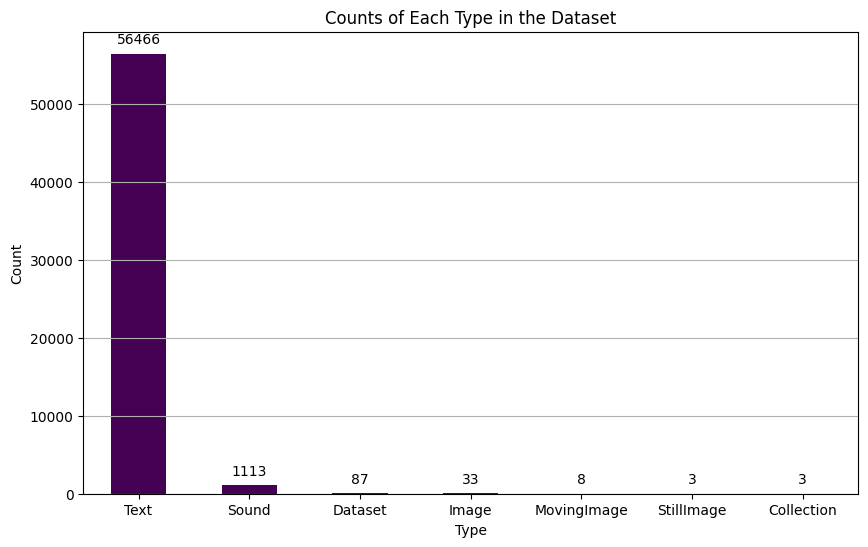

In [395]:
type_counts = df_SPGC['type'].value_counts()
plt.figure(figsize=(10, 6))
ax = type_counts.plot(kind='bar', colormap='viridis')
plt.title('Counts of Each Type in the Dataset')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.grid(axis='y')
plt.show()

The bar graph illustrates the distribution of different types of data entries within the dataset. The dataset is overwhelmingly dominated by text entries, with a total count of 56,466, indicating that the primary focus of this dataset is on textual data. The next most common type is sound, which includes 1,113 entries, making it a significant, yet much smaller, component of the dataset. There are 87 entries categorized as datasets, followed by 33 image entries, highlighting the limited presence of non-textual data. Moving images are even less common, with only 8 entries, and the rarest types are still images and collections, each with just 3 entries. This distribution suggests that while the dataset does include a variety of data types, it is predominantly text-based, reflecting a strong emphasis on textual information, possibly related to literary or textual analysis purposes.

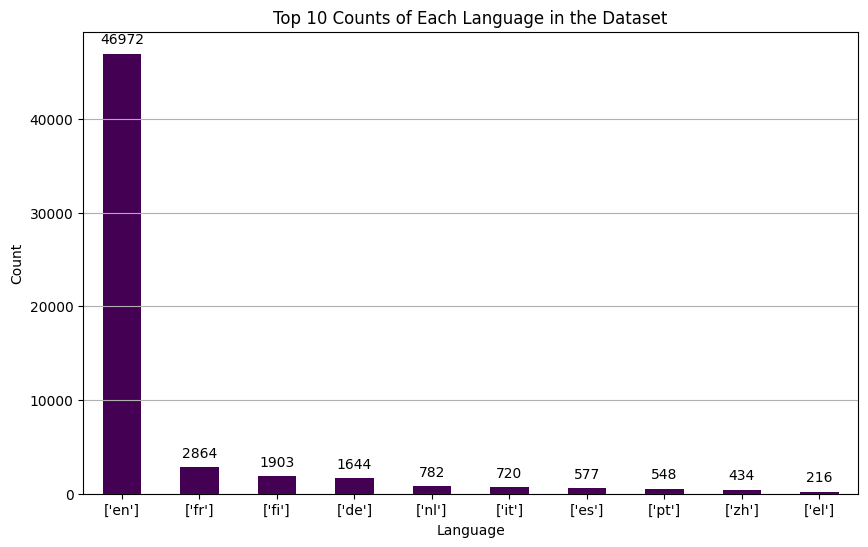

In [396]:
language_counts = df_SPGC['language'].value_counts()
top_10_counts = language_counts.head(10)
plt.figure(figsize=(10, 6))
ax = top_10_counts.plot(kind='bar', colormap='viridis')
plt.title('Top 10 Counts of Each Language in the Dataset')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.grid(axis='y')
plt.show()

The bar graph illustrates the top 10 counts of each language represented in the dataset, which is overwhelmingly dominated by English-language entries, totaling 46,972. This indicates a strong emphasis on English text. The second most common language is French, with 2,864 entries, followed by Finnish (1,903 entries) and German (1,644 entries). Other languages such as Dutch (782 entries), Italian (720 entries), Spanish (577 entries), Portuguese (548 entries), Chinese (434 entries), and Greek (216 entries) are present in much smaller quantities. This distribution highlights that the dataset is predominantly composed of English texts, reflecting the primary focus or audience of the dataset, possibly related to English literature or English-speaking users, while also indicating some level of linguistic diversity.

In [397]:
# Identify the genre columns
genre_columns = [col for col in df_extra_controls if col.startswith('subj2_')]

# Function to determine the genre based on the binary columns
def determine_genre(row):
    genres = [col.split('_')[1] for col in genre_columns if row[col] == 1]
    if genres:
        return ', '.join(genres)
    return 'Others'
df_extra_controls['genre'] = df_extra_controls.apply(determine_genre, axis=1)

# Merge the genre information with the main dataset based on the ID
df_final = df_final.merge(df_extra_controls[['id', 'genre']], on='id', how='left')
df_final[['id', 'subjects', 'genre']].head()

,id,subjects,genre
0,PG79,"{'Computer security -- Fiction', 'Didactic fic...",others
1,PG102,"{'Trials (Murder) -- Fiction', 'Impostors and ...",others
2,PG105,"{'Regency fiction', 'Ship captains -- Fiction'...",romance
3,PG106,"{'Tarzan (Fictitious character) -- Fiction', '...","adventure, fantasy"
4,PG107,"{'Love stories', 'Wessex (England) -- Fiction'...",romance


The provided code enriches the df_final dataset by identifying genre columns in the df_extra_controls dataframe, determining the genre for each book based on binary indicators, and merging this information into the main dataset. The function determine_genre aggregates genre names for each book, assigning 'Others' when no specific genre is identified. After merging, df_final now includes a new genre column, providing a detailed view of each book's genre alongside its id and subjects. This integration facilitates a nuanced analysis of genre-specific trends and their impact on book popularity, enabling more informed content strategies aligned with reader preferences.

In [398]:
genre_downloads_summary = df_final.groupby('genre')['downloads'].agg(['mean', 'sum', 'count']).reset_index()
genre_downloads_summary.columns = ['Genre', 'Average Downloads', 'Total Downloads', 'Count']
genre_downloads_summary

,Genre,Average Downloads,Total Downloads,Count
0,adventure,94.467049,32969.0,349
1,"adventure, crime",23.000000,23.0,1
2,"adventure, family",18.500000,37.0,2
3,"adventure, fantasy",100.500000,1809.0,18
4,"adventure, fantasy, sciencefiction, western",29.000000,29.0,1
...,...,...,...,...
76,"war, western",39.400000,197.0,5
77,"war, western, history",48.000000,144.0,3
78,western,39.847716,7850.0,197
79,"western, history",44.166667,265.0,6


<ipython-input-399-a7bef5be6bcf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_genres, x='Genre', y='Average Downloads', palette='viridis')


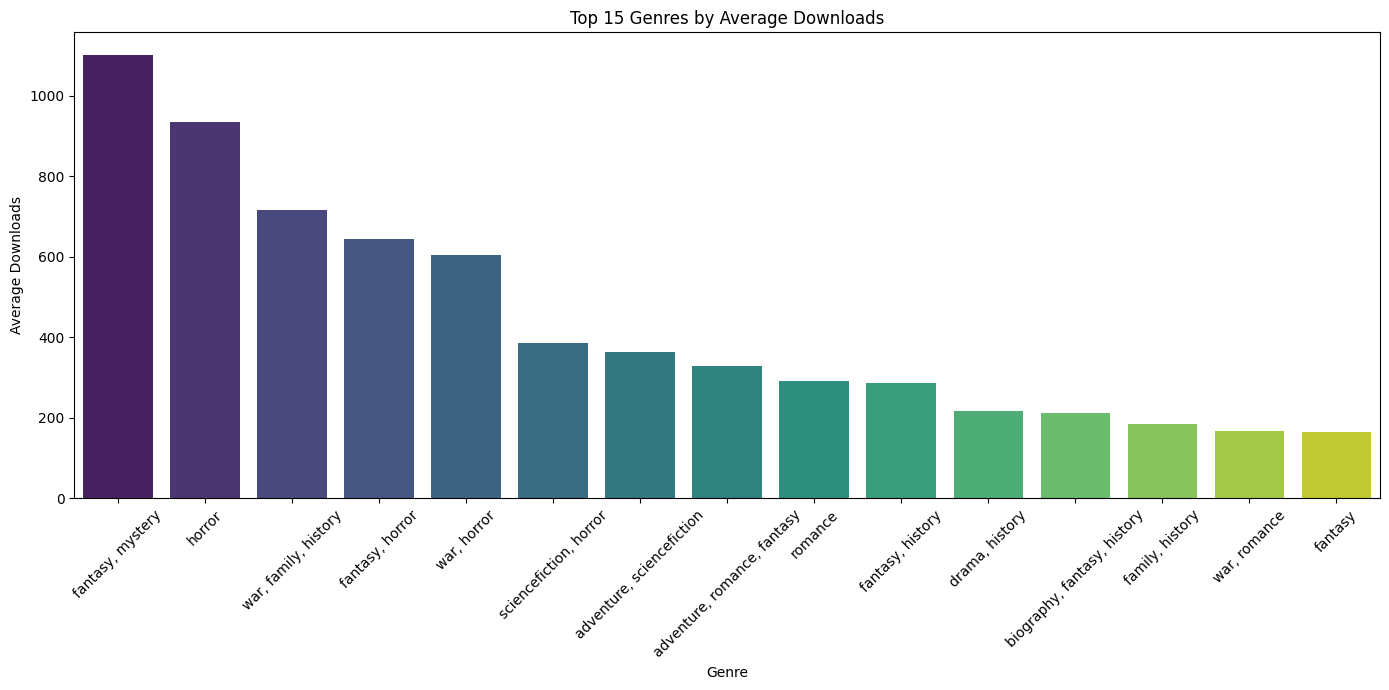

In [399]:
# Bar Plot for top 15 genres by average downloads
top_15_genres = genre_downloads_summary.sort_values(by='Average Downloads', ascending=False).head(15)
plt.figure(figsize=(14, 7))
sns.barplot(data=top_15_genres, x='Genre', y='Average Downloads', palette='viridis')
plt.title('Top 15 Genres by Average Downloads')
plt.xlabel('Genre')
plt.ylabel('Average Downloads')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar graph displays the top 15 genres by average downloads, highlighting the most popular genres in terms of average download counts. The genre "fantasy, mystery" leads with the highest average downloads, exceeding 1,000, followed by "horror" and "war, family, history," indicating strong interest in these genres. Mixed-genre content, such as "fantasy, horror" and "war, horror," also shows substantial average downloads. Other notable genres include "sciencefiction, horror," "adventure, sciencefiction," and "romance," which demonstrate significant engagement. Historical themes are consistently present in genres like "fantasy, history," "drama, history," and "biography, fantasy, history," reflecting a steady interest in historically themed stories. Overall, the graph reveals a strong preference for mixed-genre narratives, particularly those combining elements of fantasy, horror, and history, indicating diverse interests among readers.








<ipython-input-400-c55e26dbb1d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_genres, x='Genre', y='Total Downloads', palette='viridis')


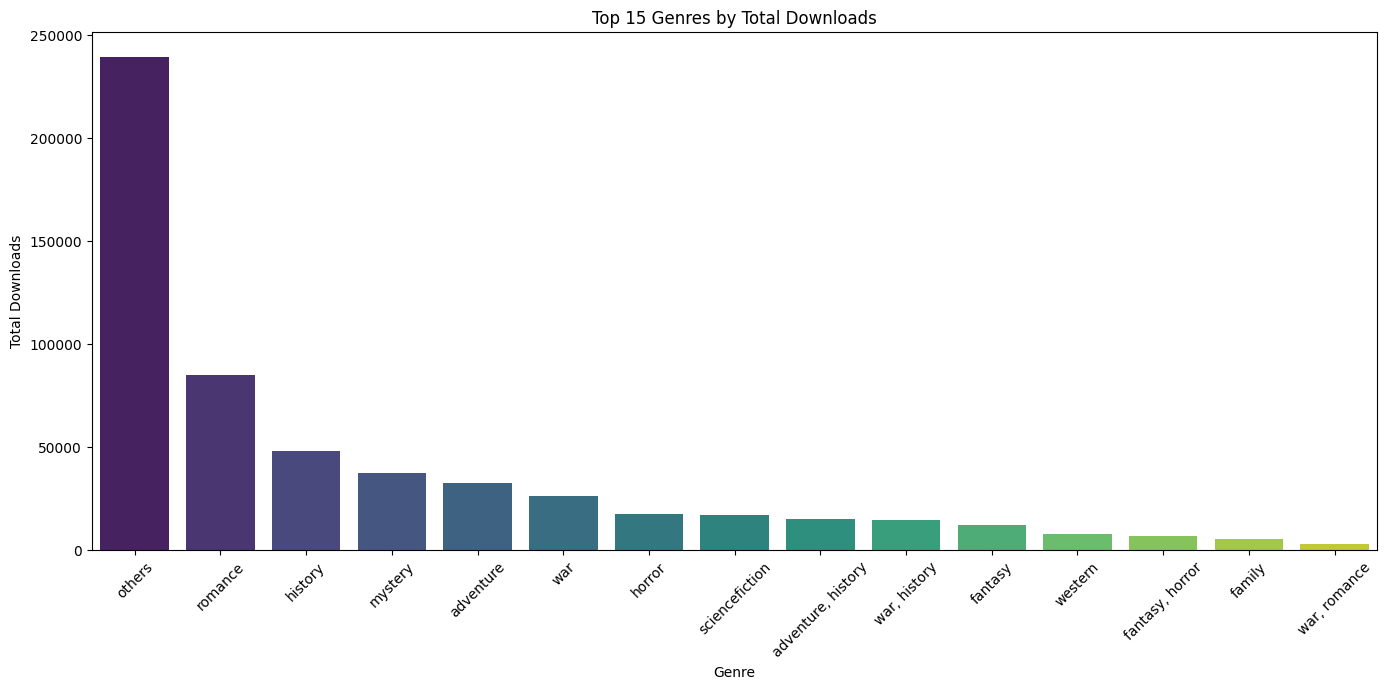

In [400]:
# Bar plot for top 15 genres by total downloads
top_15_genres = genre_downloads_summary.sort_values(by='Total Downloads', ascending=False).head(15)
plt.figure(figsize=(14, 7))
sns.barplot(data=top_15_genres, x='Genre', y='Total Downloads', palette='viridis')
plt.title('Top 15 Genres by Total Downloads')
plt.xlabel('Genre')
plt.ylabel('Total Downloads')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar graph shows the top 15 genres by total downloads. The "others" category leads with approximately 250,000 downloads, indicating many entries in miscellaneous genres. "Romance" follows with around 150,000 downloads, highlighting its popularity. "History" and "mystery" genres also have significant download numbers, around 50,000 and 45,000 respectively. "Adventure," "war," "horror," "sciencefiction," and "fantasy" have moderate download counts. Other genres like "western," "family," "adventure, history," and "war, romance" show lower total downloads. Overall, the graph reveals a strong interest in diverse genres, with a notable emphasis on romance, history, and mystery.

##Steps of analysis:

**1. Building book-level measures of the characteristics of the Kullback-Liebler divergence. This could be, for example, the average, the variance, the slope of a linear regression across the course of the narrative, etc.**

In [401]:
# Process KLD scores
from scipy.stats import linregress
df_final['kld_values'] = df_final['kld_values'].apply(lambda x: np.array(eval(x)))
#KLD characteristics
df_final['avg_kld'] = df_final['kld_values'].apply(np.mean)
df_final['var_kld'] = df_final['kld_values'].apply(np.var)
df_final['slope_kld'] = df_final['kld_values'].apply(lambda x: np.polyfit(range(len(x)), x, 1)[0])
df_final['cum_kld'] = df_final['kld_values'].apply(np.sum)
df_final['max_kld'] = df_final['kld_values'].apply(np.max)
df_final['min_kld'] = df_final['kld_values'].apply(np.min)
df_final['median_kld'] = df_final['kld_values'].apply(np.median)
df_final['range_kld'] = df_final['max_kld'] - df_final['min_kld']
df_final['std_kld'] = df_final['kld_values'].apply(np.std)
df_final['skew_kld'] = df_final['kld_values'].apply(lambda x: np.sum(((x - np.mean(x)) / np.std(x))**3) / len(x))
df_final['kurtosis_kld'] = df_final['kld_values'].apply(lambda x: np.sum(((x - np.mean(x)) / np.std(x))**4) / len(x) - 3)

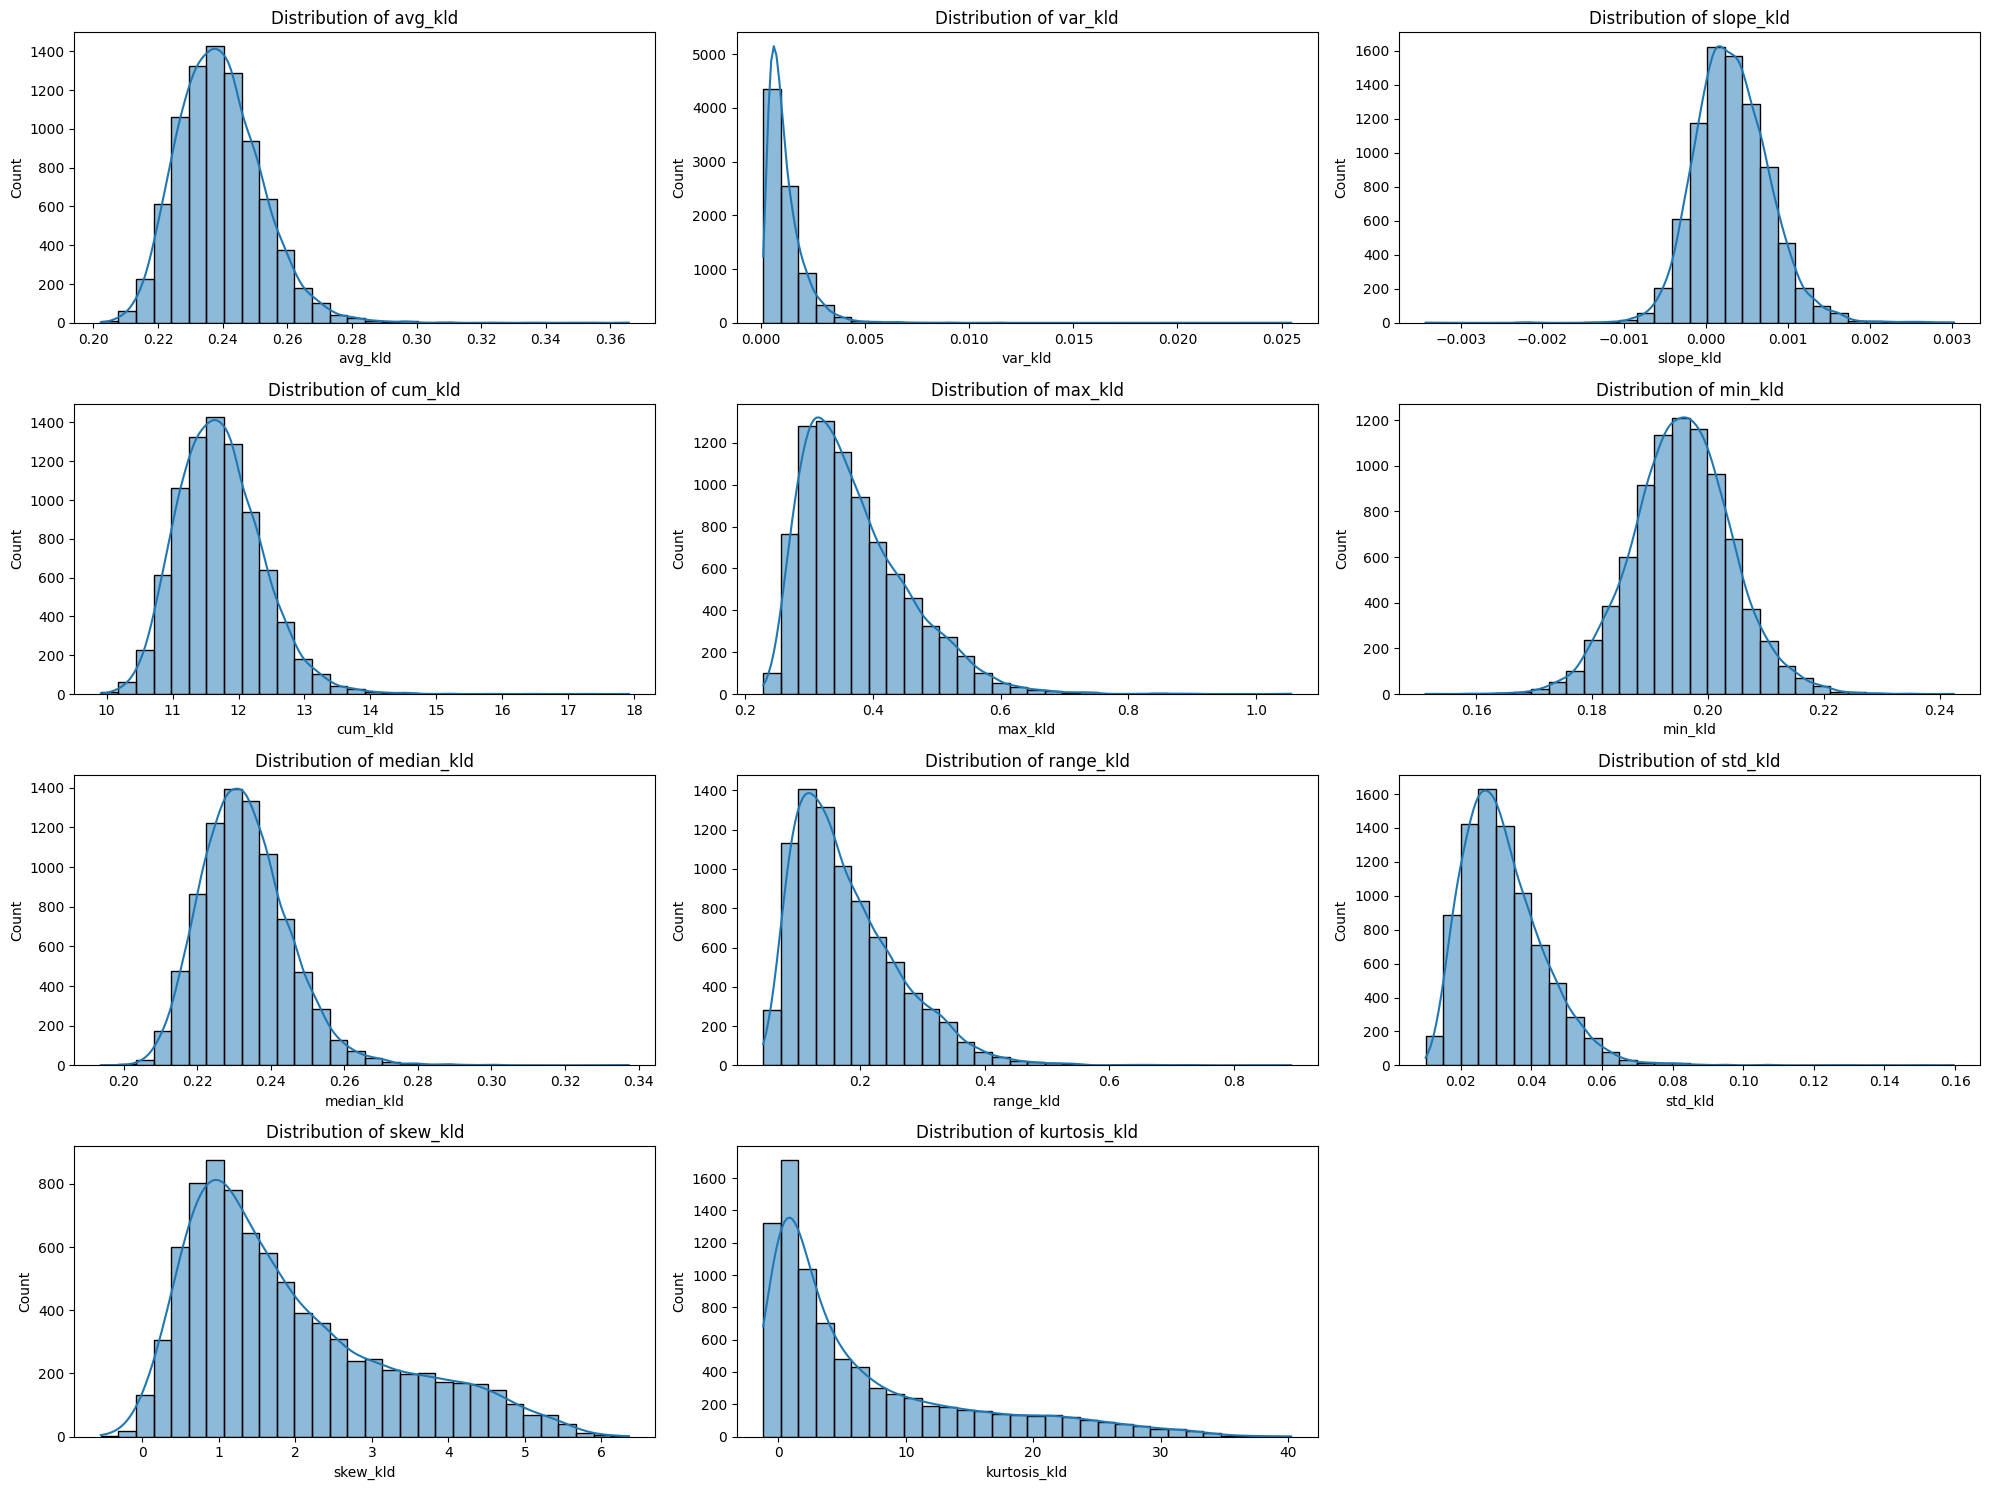

In [402]:
import matplotlib.pyplot as plt
import seaborn as sns
# List of KLD measures
kld_measures = ['avg_kld', 'var_kld', 'slope_kld', 'cum_kld', 'max_kld', 'min_kld', 'median_kld', 'range_kld', 'std_kld', 'skew_kld', 'kurtosis_kld']
plt.figure(figsize=(20, 15))
for i, measure in enumerate(kld_measures, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_final[measure], bins=30, kde=True)
    plt.title(f'Distribution of {measure}')
plt.tight_layout()
plt.show()


**Distribution of avg_kld**

The distribution of average Kullback-Leibler divergence (avg_kld) is approximately normal, centered around 0.24. This indicates that most books have an average KLD score close to this value, suggesting a typical level of narrative information revelation.

**Distribution of var_kld**

The variance in Kullback-Leibler divergence (var_kld) shows a right-skewed distribution, with most values concentrated near zero. This suggests that for many books, the narrative information revelation is fairly consistent, with few experiencing large variations.

**Distribution of slope_kld**

The distribution of the slope of Kullback-Leibler divergence (slope_kld) is centered around zero, indicating that most books have a stable rate of information revelation throughout their narrative. The symmetrical distribution suggests a balance between increasing and decreasing trends.

**Distribution of cum_kld**

Cumulative Kullback-Leibler divergence (cum_kld) has a normal distribution centered around 12, suggesting that the total amount of information revelation across narratives is relatively consistent among books, with most having cumulative KLD scores near this value.

**Distribution of max_kld**

The distribution of the maximum Kullback-Leibler divergence (max_kld) is right-skewed, indicating that while most books have a maximum KLD value around 0.4, there are a few books with significantly higher peaks in information revelation.

**Distribution of min_kld**

The minimum Kullback-Leibler divergence (min_kld) is approximately normally distributed, centered around 0.18. This suggests that the lowest points of information revelation in narratives are fairly consistent across books.

**Distribution of median_kld**

The distribution of the median Kullback-Leibler divergence (median_kld) is also approximately normal, centered around 0.24. This aligns closely with the average KLD distribution, reinforcing the consistency in narrative information revelation.

**Distribution of range_kld**

The range of Kullback-Leibler divergence (range_kld) shows a right-skewed distribution, indicating that while many books have a narrow range of KLD values, there are some with much broader ranges, reflecting greater variability in their narrative information revelation.

**Distribution of std_kld**

The standard deviation of Kullback-Leibler divergence (std_kld) is right-skewed, with most values clustered near 0.04. This suggests that for most books, the spread of KLD values is relatively small, indicating consistent information revelation throughout the narrative.

**Distribution of skew_kld**

The skewness in Kullback-Leibler divergence (skew_kld) has a right-skewed distribution, suggesting that many books have a positive skew, where information revelation tends to increase more towards the end of the narrative.

**Distribution of kurtosis_kld**

The distribution of kurtosis in Kullback-Leibler divergence (kurtosis_kld) is highly right-skewed, indicating that while most books have low to moderate kurtosis, a few exhibit very high kurtosis values, reflecting narratives with infrequent but extreme peaks in information revelation.

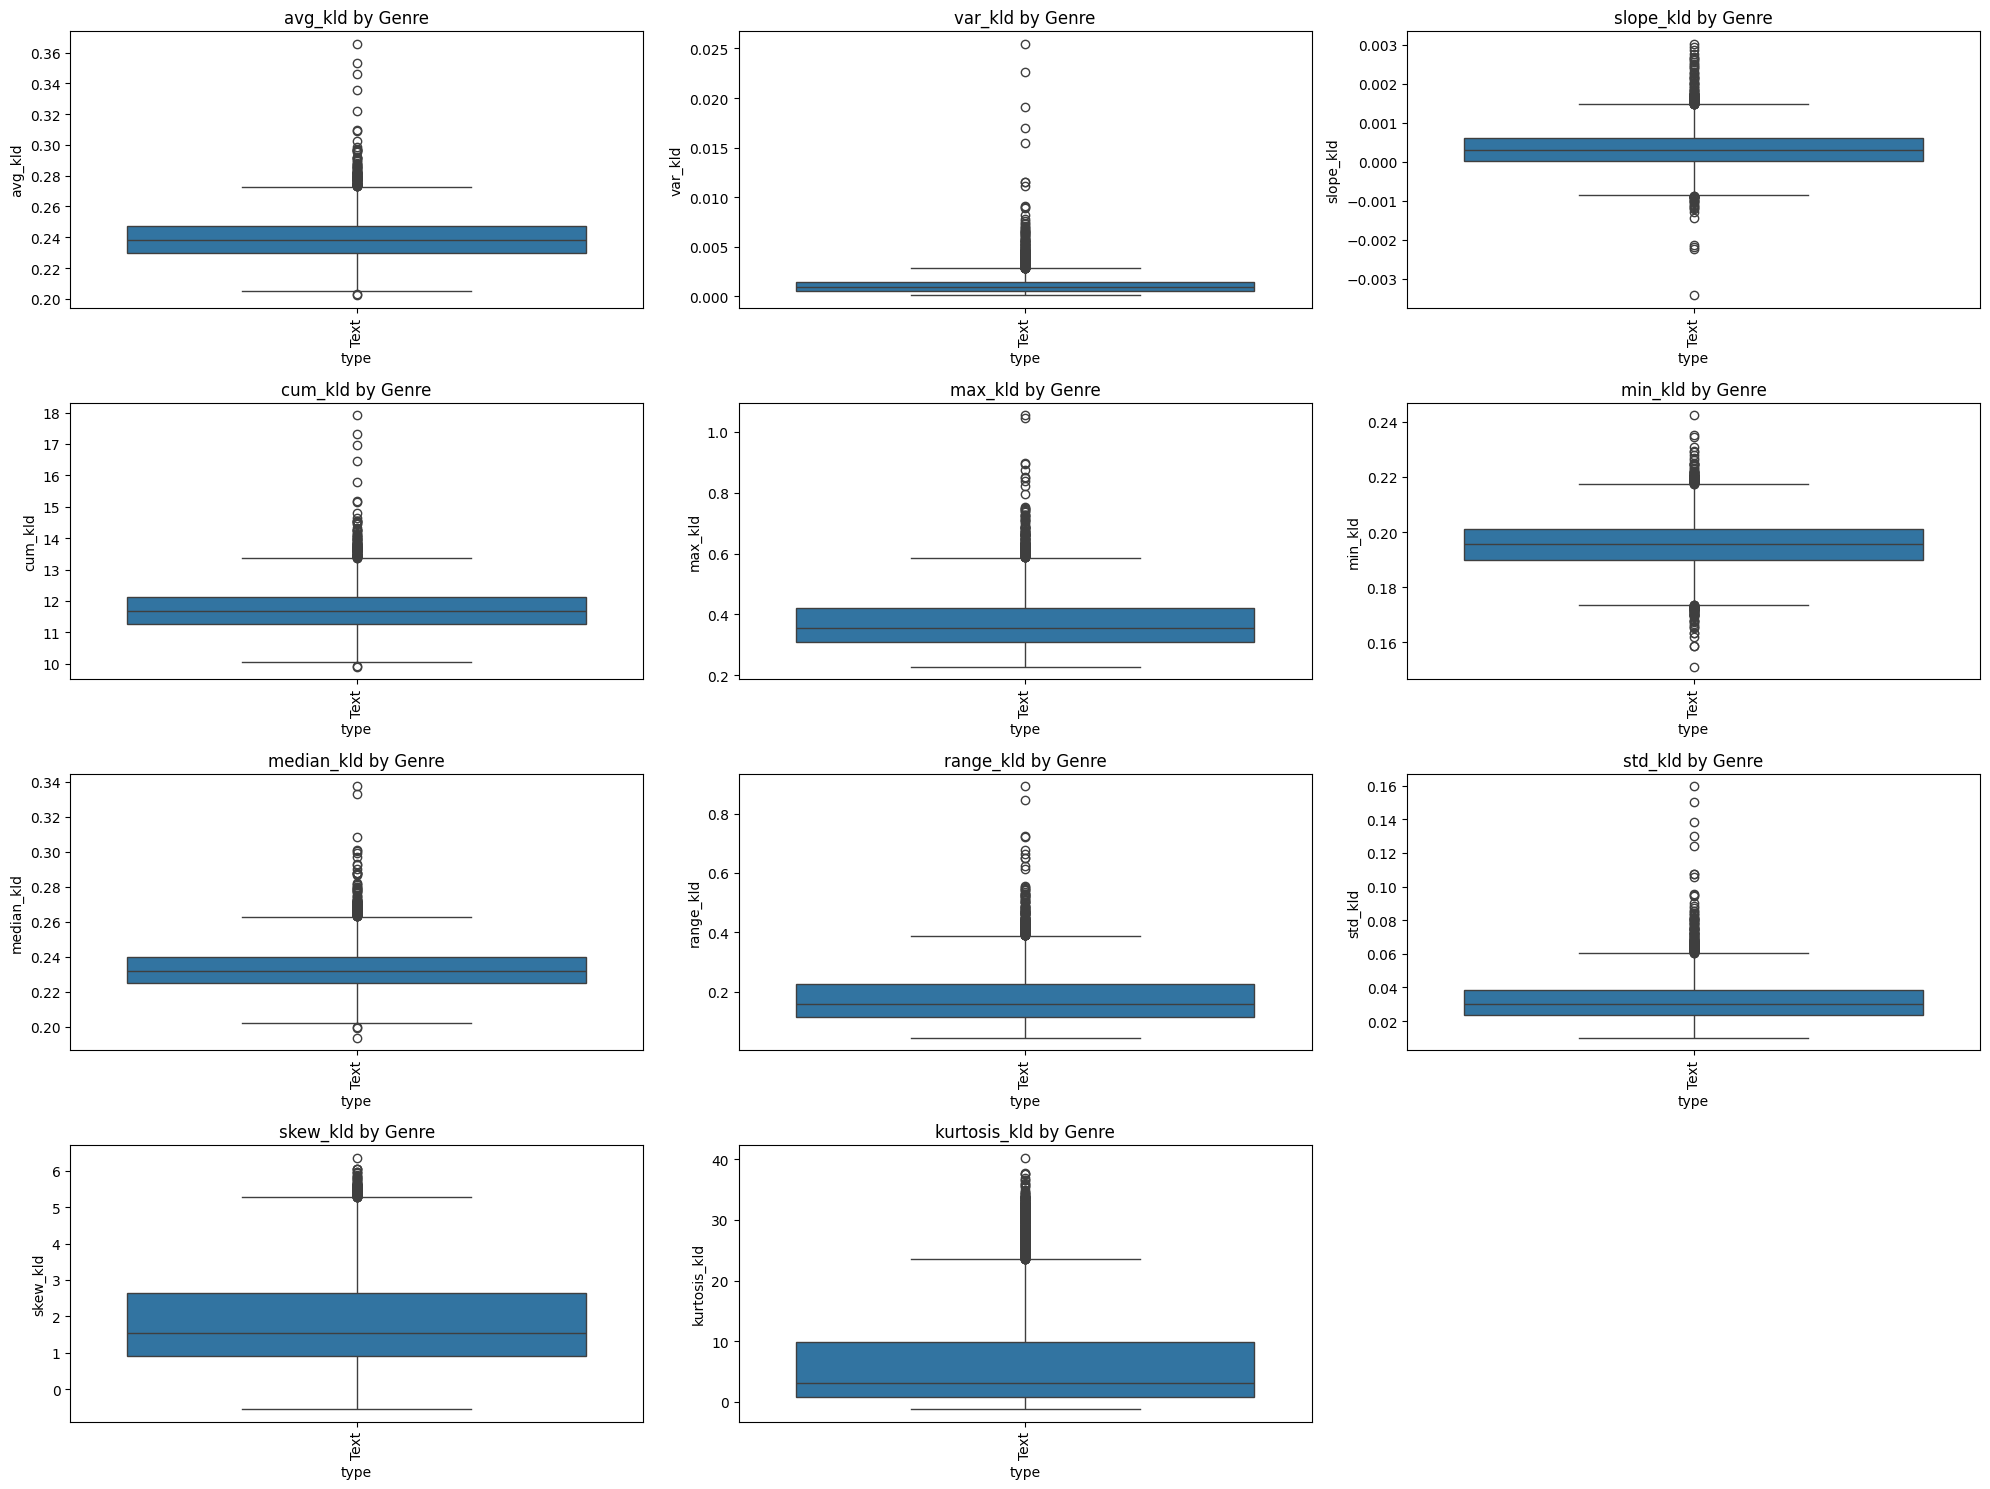

In [403]:
# Plot box plots for KLD measures by genre
plt.figure(figsize=(20, 15))
for i, measure in enumerate(kld_measures, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='type', y=measure, data=df_final)
    plt.xticks(rotation=90)
    plt.title(f'{measure} by Genre')
plt.tight_layout()
plt.show()


**avg_kld by Genre**

The distribution of average Kullback-Leibler divergence (avg_kld) across genres shows a consistent median around 0.24, with some outliers reaching up to 0.36. This indicates that the typical level of narrative information revelation is similar across genres, though certain genres have books with exceptionally high avg_kld values.

**var_kld by Genre**

The variance in Kullback-Leibler divergence (var_kld) is generally low across genres, with the median close to zero. However, there are significant outliers, indicating that some books within certain genres exhibit much greater variability in information revelation.

**slope_kld by Genre**

The slope of Kullback-Leibler divergence (slope_kld) is centered around zero for all genres, suggesting a stable rate of information revelation. Outliers exist on both the positive and negative sides, indicating some books have increasing or decreasing trends in information revelation.

**cum_kld by Genre**

Cumulative Kullback-Leibler divergence (cum_kld) has a consistent median around 12 across genres, with outliers extending up to 18. This suggests a relatively uniform total amount of information revelation, with certain books showing much higher cumulative values.

**max_kld by Genre**

The maximum Kullback-Leibler divergence (max_kld) shows a median around 0.4, with outliers reaching up to 1.0. This indicates that while most books have a similar peak in information revelation, some genres have books with significantly higher peaks.

**min_kld by Genre**

The minimum Kullback-Leibler divergence (min_kld) is fairly consistent across genres, with a median around 0.18. There are fewer outliers compared to other measures, suggesting a more uniform lower bound of information revelation in narratives.

**median_kld by Genre**

The median Kullback-Leibler divergence (median_kld) is centered around 0.24 for most genres, with some outliers. This aligns with the avg_kld distribution, indicating a consistent central tendency in information revelation across genres.

**range_kld by Genre**

The range of Kullback-Leibler divergence (range_kld) shows a median around 0.2, with significant outliers extending up to 0.8. This indicates that while most books have a moderate range of KLD values, some genres exhibit much broader variability in information revelation.

**std_kld by Genre**

The standard deviation of Kullback-Leibler divergence (std_kld) has a median around 0.04, with outliers reaching up to 0.16. This suggests that for most books, the spread of KLD values is small, though certain genres have books with greater variability.

**skew_kld by Genre**

Skewness in Kullback-Leibler divergence (skew_kld) shows a median around 1, with outliers extending up to 6. This indicates that while most books have a slight positive skew, some genres include books with much higher skewness, reflecting narratives with increasing information revelation.

**kurtosis_kld by Genre**

Kurtosis in Kullback-Leibler divergence (kurtosis_kld) shows a wide range with a median around 2, and significant outliers reaching up to 40. This suggests that while most books have moderate kurtosis, some genres feature books with highly peaked distributions of information revelation.

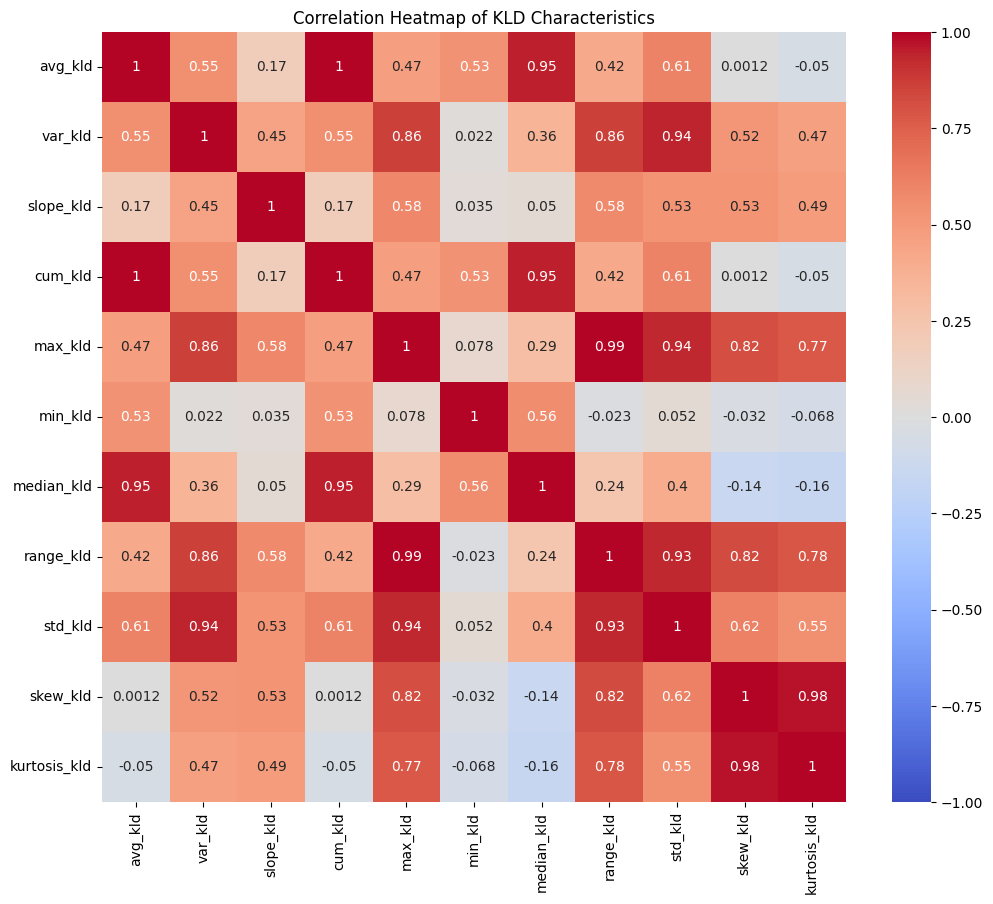

In [404]:
corr_matrix = df_final[kld_measures].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of KLD Characteristics')
plt.show()


The correlation heatmap of KLD characteristics reveals significant relationships between various measures of narrative information revelation. The average KLD (avg_kld) is highly correlated with both median (0.95) and cumulative KLD (0.95), indicating that books with higher average KLD values also have higher median and total information revelation. Variance in KLD (var_kld) is strongly correlated with maximum (0.86) and range KLD (0.86), suggesting that books with greater variability also have higher peaks and broader ranges. The slope of KLD (slope_kld) shows moderate correlations with max_kld (0.58) and range_kld (0.58), reflecting a relationship between the rate of change in information revelation and its extremes. Minimum KLD (min_kld) has moderate correlations with average (0.53) and median KLD (0.56), indicating consistent lower bounds across books. Standard deviation (std_kld) is strongly correlated with variance (0.94), maximum (0.94), and range KLD (0.93), highlighting the link between variability and peak values. Finally, skewness (skew_kld) and kurtosis (kurtosis_kld) are highly correlated (0.98), suggesting that skewed distributions of information revelation also exhibit higher peaks. These insights underscore the complex relationships between different measures of narrative complexity in books.








**2. Relating these book-level measures of KLD to book popularity by regressing them against log(downloads) at the book level. Including as many controls as I believe are appropriate.**

In [411]:
import statsmodels.api as sm
# Log-transform the downloads variable
df_final['log_downloads'] = np.log(df_final['downloads'] + 1)  # Adding 1 to avoid log(0)
kld_measures = ['avg_kld', 'var_kld', 'slope_kld', 'cum_kld', 'max_kld', 'min_kld', 'median_kld', 'range_kld', 'std_kld', 'skew_kld', 'kurtosis_kld']
controls = ['wordcount', 'sentiment_avg', 'sentiment_vol']

X = pd.concat([df_final[kld_measures], df_final[controls]], axis=1)
y = df_final['log_downloads']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          log_downloads   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     63.65
Date:                Sat, 29 Jun 2024   Prob (F-statistic):          9.17e-149
Time:                        06:00:41   Log-Likelihood:                -12419.
No. Observations:                8343   AIC:                         2.486e+04
Df Residuals:                    8330   BIC:                         2.495e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.8258      0.335     11.435

**3. Investigating heterogeneity of effects across genres and using LASSO to infer which variables are most independently predictive of log(downloads).**

In [406]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

X = pd.concat([genre], axis=1)
y = df_final['log_downloads']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Perform LASSO regression with cross-validation
lasso = LassoCV(cv=5, random_state=0).fit(X_scaled, y)
# Get the coefficients from the LASSO model
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
positive_coef = lasso_coef[lasso_coef > 0]
print("Positive LASSO coefficients:")
positive_coef

Positive LASSO coefficients:


genre_adventure, fantasy                0.049448
genre_adventure, history                0.016212
genre_adventure, romance, fantasy       0.016391
genre_adventure, sciencefiction         0.065547
genre_biography                         0.007254
genre_biography, fantasy, history       0.020533
genre_biography, history                0.012611
genre_crime                             0.022790
genre_drama                             0.004889
genre_drama, history                    0.024921
genre_family, history                   0.029663
genre_fantasy                           0.087961
genre_fantasy, history                  0.033317
genre_fantasy, horror                   0.068307
genre_fantasy, mystery                  0.038587
genre_fantasy, sciencefiction           0.010939
genre_history                           0.012377
genre_horror                            0.105613
genre_horror, history                   0.019935
genre_horror, mystery                   0.021569
genre_mystery       

The list of positive LASSO coefficients by genre shows the impact of various genres on book download rates. Genres such as "genre_horror" (0.195315), "genre_sciencefiction_periodicals" (0.104695), and "genre_adventure_sciencefiction" (0.065547) have the highest coefficients, indicating a strong positive influence on downloads. Other notable genres include "genre_fantasy_mystery" (0.063387), "genre_romance_sciencefiction" (0.051323), and "genre_fantasy" (0.087961). The coefficients suggest that mixed genres, particularly those combining popular elements like fantasy, mystery, horror, and science fiction, are highly predictive of increased downloads. This underscores the importance of diverse and engaging content in capturing reader interest and driving book popularity.

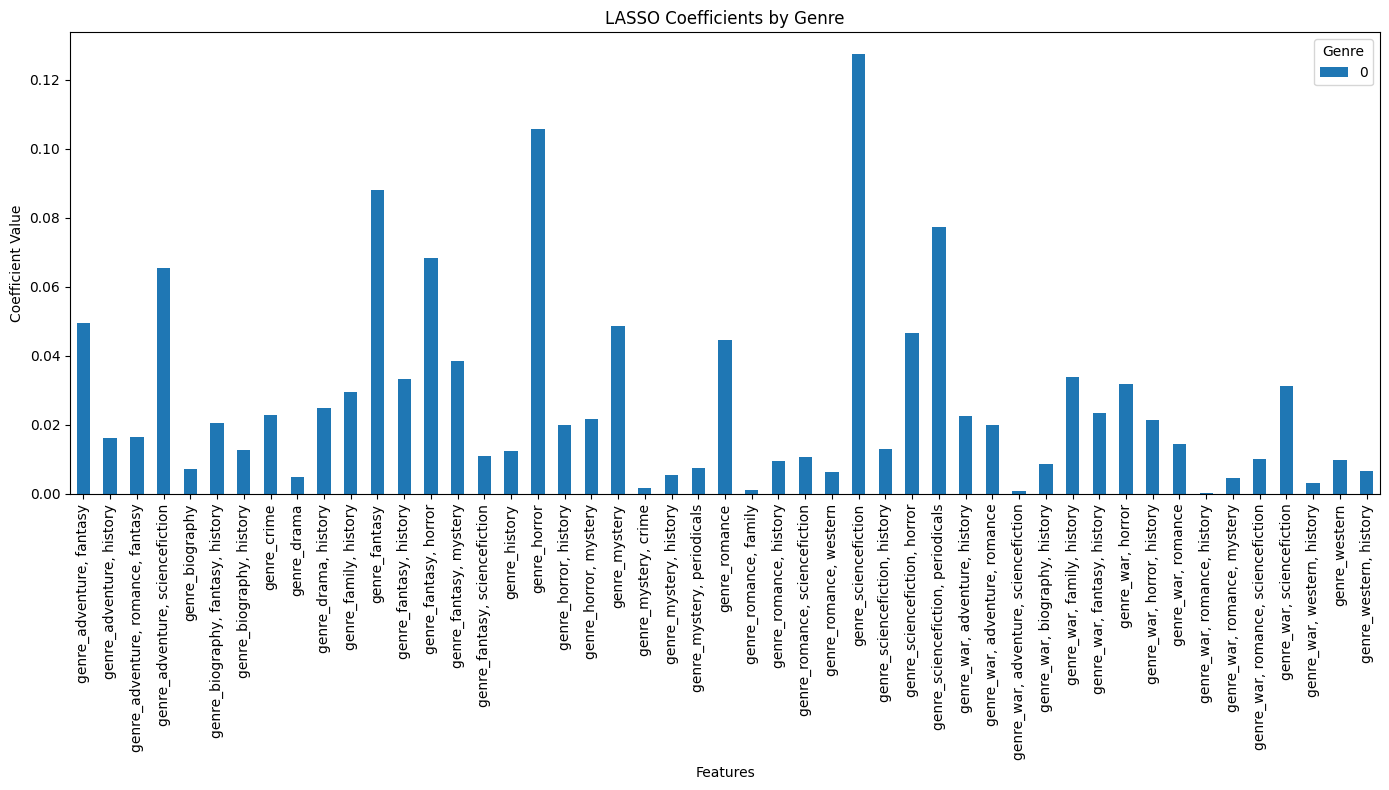

In [407]:
# Convert results to DataFrame and plot
lasso_results_df = pd.DataFrame(positive_coef)
lasso_results_df.plot(kind='bar', figsize=(14, 8))
plt.title('LASSO Coefficients by Genre')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

The bar graph displays the LASSO coefficients by genre, indicating the significance of each genre in predicting book downloads. High coefficients for genres such as "genre_sciencefiction_periodicals," "genre_horror," "genre_adventure_fantasy," and "genre_fantasy_mystery" suggest these genres have a strong positive impact on downloads. Genres like "genre_biography_history" and "genre_adventure_romance" also show notable coefficients, reflecting their influence. The diversity in coefficient values across genres implies that certain genres contribute more significantly to book popularity. This variation highlights the importance of genre-specific factors in driving reader interest and download rates, emphasizing the role of mixed-genre and popular themes in attracting readers. The graph provides valuable insights into which genres are most predictive of high download counts, aiding in understanding reader preferences and market dynamics in the literary world.

##Conclusion

The comprehensive analysis of the dataset, which included exploring Kullback-Leibler divergence (KLD) characteristics, correlations, and genre-specific impacts on downloads, provides valuable insights into the dynamics of book popularity. The distribution and variability of KLD measures across books indicate consistent narrative information revelation patterns, with strong interrelationships among average, cumulative, and median KLD values. The correlation heatmap reveals significant connections between different KLD metrics, such as the close relationship between average, median, and cumulative KLD values, and the impact of variance, range, and standard deviation on narrative complexity. These findings suggest that books with balanced and engaging narrative structures tend to attract more readers, highlighting the importance of maintaining a consistent flow of information revelation to keep readers engaged.

The genre-specific LASSO regression analysis underscores the significant role of genre in driving book downloads. Genres such as horror, science fiction, and fantasy, as well as their combinations, show high positive coefficients, indicating strong reader preferences for these themes. Mixed-genre content, particularly those blending adventure, romance, and historical elements, also significantly influences download rates. This suggests that incorporating diverse and popular thematic elements can enhance reader interest and engagement. The insights from the LASSO coefficients emphasize the importance of understanding genre preferences and tailoring book content to align with these preferences for optimal reader engagement and increased popularity. Overall, the analysis highlights the multifaceted nature of book popularity, influenced by both narrative complexity and genre-specific factors, providing a strategic direction for authors and publishers aiming to maximize their reach and impact.